## Feely method for calculating the anthropogenic change in DIC

##### Preindustrial CO2 + anthropogenic co2 = present day co2
### Summary: waters < σθ25.0:
    use a quadratic fit to get anthropogenic CO2 from pot dens.
## waters > density 25
    use current DIC and TA to get current pco2, 
    subtract (pres-day - preind pco2 change == 129) to get past pco2,
    use that pco2 to get a past DIC. 
    present DIC - past DIC = anthropogenic co2


##  Feely et al supplemental text:

    The anthropogenic CO2 of the coastal waters was determined one of two ways. The
    higher density waters (σθ>25.0) were presumed to be consistent with open ocean waters.
    The large-scale open ocean anthropogenic CO2 distributions were evaluated by Sabine et
    al. (S13) for the entire Pacific using the ΔC* method. These estimates require a water
    mass age tracer, such as chlorofluorocarbons, which were not available for the coastal
    waters. Therefore, we took a subset of the stations used by Sabine et al. (S13) that were
    between 21 - 60°N and 140-109°W (Fig. S1) and fit the estimated anthropogenic CO2
    concentrations as a function of potential density (Fig. S2).
    Anthropogenic CO2 = -2742 + 225.31 (σθ) - 4.5604 (σθ)


    The data were limited to the upper 250 m of the water column since that is the maximum
    depth of the coastal sections presented here. The anthropogenic CO2 of the coastal waters
    was then calculated from potential density using equation S1. The highest densities were
    comparable between the open ocean and the coastal waters.
    The lower density waters (σθ<25.0) are generally found very near the surface or represent
    coastal waters with river influences. Either way, these waters are not as strongly
    connected with the subsurface open-ocean waters and are much more likely to be
    tracking the current atmospheric CO2 concentrations. To estimate the pre-industrial DIC
    concentration of these waters, the measured DIC and TA were used to calculate pCO2.
    The calculated pCO2 was then decreased by the change in atmospheric CO2 between
    1800 and 2007. This revised pCO2 was then used together with the TA to calculate a preindustrial DIC. The difference between the measured DIC and the estimated preindustrial DIC is taken as the anthropogenic CO2 of these waters. This is the same
    approach used by Sabine et al. (S13) and others for determining surface water
    anthropogenic CO2 concentrations.
    The boundary between these two methods was chosen to be σθ=25.0 because the potential
    density versus anthropogenic CO2 function showed much larger scatter at σθ<25.0 Also, a
    σθ of 25.0 represents the highest density of surface waters from the open-ocean data set,
    thus cutting all waters with densities lighter than 25.0 eliminated the variable surface
    waters from the fit. 

In [62]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [63]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [64]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Visualize potential density of incoming BC waters - see where it is >25

#### January 1, 2018

In [161]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
potdens = gsw.sigma0(sal,temp)
print(np.max(potdens))
print(np.min(potdens))
potdens_mask = np.copy(potdens)
potdens_mask[potdens>25] = 1
potdens_mask[potdens<=25] = -1


26.522714213723702
23.659150845999193


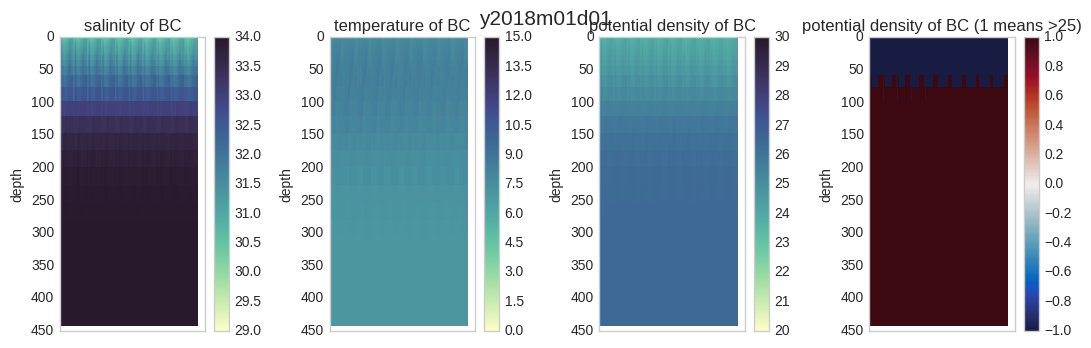

In [162]:
fig = plt.figure(figsize=(11,3.5))
nop = 4
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (sal)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=29, vmax=34)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('salinity of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (temp)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=0, vmax=15)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('temperature of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (potdens)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=20, vmax=30)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (potdens_mask)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=-1, vmax=1)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC (1 means >25)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

        
plt.suptitle('y2018m01d01', fontsize = 15)
plt.tight_layout()

## Visualize potential density of incoming BC waters - see where it is >25

#### June 1, 2018 - more 'exciting' - deeper waters coming up

In [163]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m06d01.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
potdens = gsw.sigma0(sal,temp)
potdens_mask = np.copy(potdens)
potdens_mask[potdens>25] = 1
potdens_mask[potdens<=25] = -1

DIC = test_LO['DIC'][0,:,0,:]
TA = test_LO['TA'][0,:,0,:]

depth_this = np.zeros_like(TA)

for i in range(0,950):
    depth_this[:,i] = zlevels

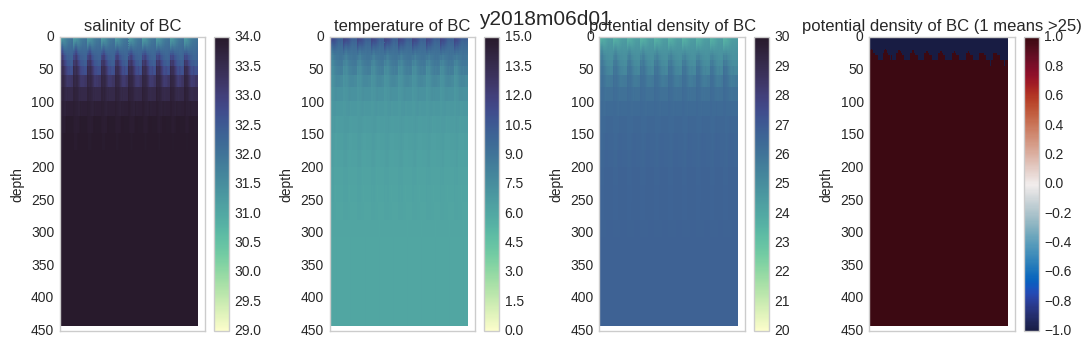

In [164]:
fig = plt.figure(figsize=(11,3.5))
nop = 4
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (sal)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=29, vmax=34)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('salinity of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (temp)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=0, vmax=15)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('temperature of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (potdens)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=20, vmax=30)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 950)
        sd = (potdens_mask)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=-1, vmax=1)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC (1 means >25)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
plt.suptitle('y2018m06d01', fontsize = 15)
plt.tight_layout()

In [165]:
potdens_over25_anthpco2 = np.copy(potdens)
potdens_over25_anthpco2 = -2742 + 225.31*potdens - 4.5604*(potdens**2)
potdens_over25_anthpco2[potdens_mask<1] = 0

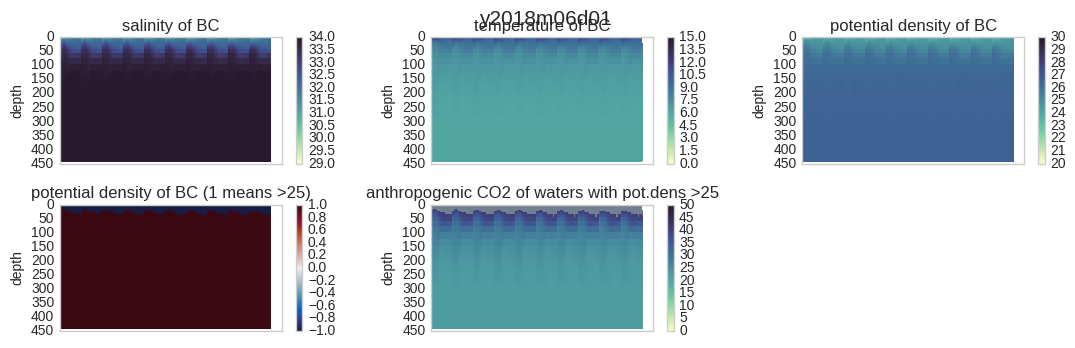

In [166]:
fig = plt.figure(figsize=(11,3.5))
nop = 5
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (sal)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=29, vmax=34)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('salinity of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (temp)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=0, vmax=15)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('temperature of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (potdens)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=20, vmax=30)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (potdens_mask)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=-1, vmax=1)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC (1 means >25)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 5:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (potdens_over25_anthpco2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=0, vmax=50)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('anthropogenic CO2 of waters with pot.dens >25') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
plt.suptitle('y2018m06d01', fontsize = 15)
plt.tight_layout()

In [167]:
t_preind = nc.Dataset('LOy2018m06d01_preind_DIC.nc')

preind_DIC = t_preind['model_output']['preind_dic'][:]

In [168]:
DIC_preind_PDover25 = np.zeros_like(DIC)
DIC_preind_PDunder25 = np.zeros_like(DIC)
DIC_preind_allPD = np.zeros_like(DIC)

for i in range(0,40):
    for j in range(0,950):
        if potdens_mask[i,j]>0:
            DIC_preind_PDover25[i,j] = DIC[i,j] - potdens_over25_anthpco2[i,j]
            DIC_preind_allPD[i,j] = DIC[i,j] - potdens_over25_anthpco2[i,j]
        if potdens_mask[i,j]<0:
            DIC_preind_PDunder25[i,j] = preind_DIC[i,j]
            DIC_preind_allPD[i,j] = preind_DIC[i,j]

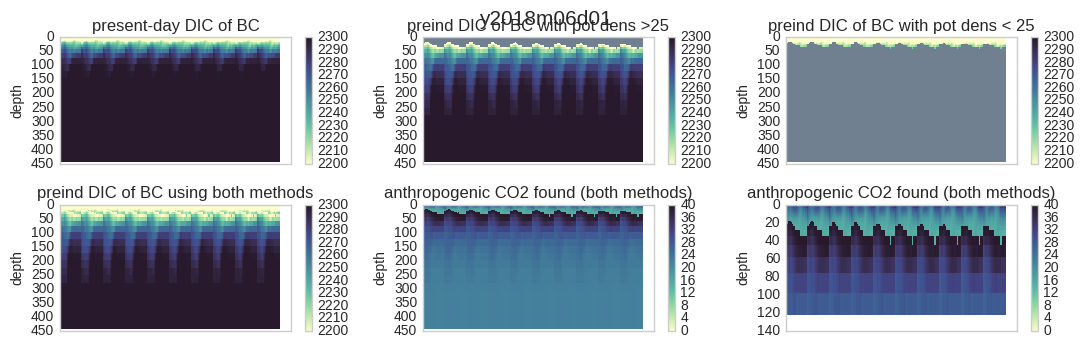

In [171]:
fig = plt.figure(figsize=(11,3.5))
nop = 6
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=2200, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('present-day DIC of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
    if i == 2:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC_preind_PDover25)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=2200, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preind DIC of BC with pot dens >25') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC_preind_PDunder25)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=2200, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preind DIC of BC with pot dens < 25') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 4:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC_preind_allPD)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=2200, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preind DIC of BC using both methods') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 5:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC - DIC_preind_allPD)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=0, vmax=40)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('anthropogenic CO2 found (both methods)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

    if i == 6:
        ax = fig.add_subplot(2,3,i)
        section_slice = np.arange(0, 950)
        sd = (DIC - DIC_preind_allPD)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[0:28],tplt[0:28,:], cmap = tcmap, vmin=0, vmax=40)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('anthropogenic CO2 found (both methods)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
plt.suptitle('y2018m06d01', fontsize = 15)
fig.tight_layout()

In [170]:
print('MINIMUM anthropogenic DIC increase:', np.min(DIC - DIC_preind_allPD))
print('MAXIMUM anthropogenic DIC increase:', np.max(DIC - DIC_preind_allPD))

MINIMUM anthropogenic DIC increase: 14.211591660930026
MAXIMUM anthropogenic DIC increase: 40.499029114105724


NB to future self:

        I put the calculation of preindustrial 
        DIC for the waters with PD <25 into a script: calculate_preind_DIC.py
        (Iterative process where first you make a very dense lookup table for DICs
        at current TA and a range of pco2,
        then find the DIC at the pco2 closest to the one input.
        processing 1 day of BC this way takes ~20 minutes)